In [ ]:
################################################################################
########## ------- Machine Learning Inmersion ------------######################
################################################################################
#### Capacitador: André Omar Chávez Panduro
#### email: andre.chavez@urp.edu.pe
#### Tema: Reducción de Dimensiones / Segmentacion Clientes
#### version: 2.0
###############################################################################

# Anexos

In [56]:
# Anexos!
def biplot(loadings, scores, index, columns):
    fig , ax1 = plt.subplots(figsize=(9,7))

    ax1.set_xlim(-3.5,3.5)
    ax1.set_ylim(-3.5,3.5)

    # Nombre de cada estado ubicado por puntajes para cada componente principal
    for i, index in enumerate(index):
        ax1.annotate(index, (scores[i, 0], scores[i, 1]), ha='center', color='blue')

    # Líneas de referencia
    ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
    ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

    ax1.set_xlabel('Primer Componente Principal')
    ax1.set_ylabel('Segundo Componente Principal')

    # Diagramar los vectores de cargas, superponiendo un segundo eje x, y
    ax2 = ax1.twinx().twiny()

    ax2.set_ylim(-1,1)
    ax2.set_xlim(-1,1)
    ax2.set_xlabel('Vectores de cargas de los componentes principales', color='red')

    # Vectores de carga
    # La variable 'a' es un pequeño offset para separar las etiquetas de las flechas
    a = 1.07
    for i, column in enumerate(columns):
        ax2.annotate(column, (loadings[0,i]*a, loadings[1,i]*a), color='red')
        ax2.arrow(0, 0, loadings[0,i], loadings[1,i], color='red')
    plt.show()

# Conexion Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
#Importar las librerías necesarias en Python.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [9]:
# Datos de los principales indicadores del milenio

In [5]:
#Repositorios
path = '/gdrive/MyDrive/BQ - Data Science/BQ - Repositorios/DMC/Machine Learning/ML Inmersion/S6'
filename = "UN.csv"
fullpath = os.path.join(path, filename)

In [ ]:
# Lectura de los datos!

In [6]:
data = pd.read_csv(fullpath)

In [7]:
# Tenemos un dataset de indicadores del milenio!
data.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154.0,2848.0,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32.0,863.0,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52.0,11.1,9.9,67.5,70.3,44.0,1531.0,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11.0,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Dimension de los datos!
data.shape

(207, 14)

In [11]:
# Revisamos las columnas y entendemos un poco los datos!
data.columns

Index(['country', 'region', 'tfr', 'contraception', 'educationMale',
       'educationFemale', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita', 'economicActivityMale', 'economicActivityFemale',
       'illiteracyMale', 'illiteracyFemale'],
      dtype='object')

In [12]:
# Dimensiones de la data
data.isnull().sum()

country                     0
region                      0
tfr                        10
contraception              63
educationMale             131
educationFemale           131
lifeMale                   11
lifeFemale                 11
infantMortality             6
GDPperCapita               10
economicActivityMale       42
economicActivityFemale     42
illiteracyMale             47
illiteracyFemale           47
dtype: int64

In [18]:
# Vemos el % de Valores perdidos por variables
data.isnull().sum()/data.shape[0]*100

country                    0.000000
region                     0.000000
tfr                        4.830918
contraception             30.434783
educationMale             63.285024
educationFemale           63.285024
lifeMale                   5.314010
lifeFemale                 5.314010
infantMortality            2.898551
GDPperCapita               4.830918
economicActivityMale      20.289855
economicActivityFemale    20.289855
illiteracyMale            22.705314
illiteracyFemale          22.705314
dtype: float64

In [14]:
# Vista de las columnas totales del set de datos!
ColumnasTotales = data.columns.tolist()

In [15]:
# Columnas no input!
columnas_no_input = ['country','region']

In [16]:
# Me quedo con las columnas necesarias
columnas_complemento = [x for x in ColumnasTotales if x not in columnas_no_input]

In [17]:
columnas_complemento

['tfr',
 'contraception',
 'educationMale',
 'educationFemale',
 'lifeMale',
 'lifeFemale',
 'infantMortality',
 'GDPperCapita',
 'economicActivityMale',
 'economicActivityFemale',
 'illiteracyMale',
 'illiteracyFemale']

In [ ]:
# Completitud de los datos!

In [19]:
# Usamos los metodos de imputacion aprendidos!
from sklearn.impute import SimpleImputer
# Generamos el imputador iterativo - Imputacion Univariada Numerica
imp_univ_num = SimpleImputer(missing_values=np.nan, strategy='median')

In [20]:
#Subset variables numericas
data_impt_num = data[columnas_complemento]

In [21]:
# Realizamos la imputación univariada en una nueva base de datos - Variables Numericas
imp_univ_num.fit(data_impt_num)
data_imp = pd.DataFrame(data=imp_univ_num.transform(data_impt_num),
                             columns=data_impt_num.columns,dtype='float')

In [22]:
# Lo importante es que tenemos completitud de los datos!
data_imp.head()

,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,6.90,47.0,11.25,11.65,45.0,46.00,154.0,2848.0,87.5,7.2,52.800,85.00
1,2.60,47.0,11.25,11.65,68.0,74.00,32.0,863.0,76.8,48.4,10.829,20.10
2,3.81,52.0,11.10,9.90,67.5,70.30,44.0,1531.0,76.4,7.8,26.100,51.00
3,3.07,47.0,11.25,11.65,68.0,73.00,11.0,1779.0,58.8,42.4,0.264,0.36
4,3.07,47.0,11.25,11.65,66.5,72.15,30.0,1779.0,76.8,48.4,10.829,20.10


In [ ]:
# Analizamos la relación existente entre las variables
from scipy.stats.stats import pearsonr
from scipy.spatial.distance import cdist
data_imp.corr()

<ipython-input-21-1257b3003a67>:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
tfr,1.000000,-0.647003,-0.447730,-0.445638,-0.771378,-0.829277,0.797608,-0.465125,0.377880,-0.144603,0.641515,0.681676
contraception,-0.647003,1.000000,0.476270,0.460652,0.615424,0.622327,-0.594306,0.424869,-0.167461,0.093995,-0.509725,-0.504654
educationMale,-0.447730,0.476270,1.000000,0.959740,0.436309,0.449071,-0.407730,0.501221,-0.287742,0.012809,-0.284710,-0.286885
educationFemale,-0.445638,0.460652,0.959740,1.000000,0.429413,0.444937,-0.414064,0.440200,-0.252173,0.037714,-0.297876,-0.319602
lifeMale,-0.771378,0.615424,0.436309,0.429413,1.000000,0.981877,-0.926217,0.531234,-0.244318,-0.094568,-0.617730,-0.660079
lifeFemale,-0.829277,0.622327,0.449071,0.444937,0.981877,1.000000,-0.946000,0.525592,-0.299519,-0.035377,-0.664764,-0.715057
infantMortality,0.797608,-0.594306,-0.407730,-0.414064,-0.926217,-0.946000,1.000000,-0.472799,0.305908,0.010832,0.691668,0.741085
GDPperCapita,-0.465125,0.424869,0.501221,0.440200,0.531234,0.525592,-0.472799,1.000000,-0.153200,0.089362,-0.240484,-0.240295
economicActivityMale,0.377880,-0.167461,-0.287742,-0.252173,-0.244318,-0.299519,0.305908,-0.153200,1.000000,0.105049,0.378704,0.364185
economicActivityFemale,-0.144603,0.093995,0.012809,0.037714,-0.094568,-0.035377,0.010832,0.089362,0.105049,1.000000,-0.109506,-0.127826


In [23]:
matrix_correlations_paises = data_imp.corr(method='spearman')
matrix_correlations_paises

,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
tfr,1.000000,-0.619042,-0.444870,-0.474346,-0.720482,-0.830970,0.803868,-0.590916,0.418217,-0.188208,0.639799,0.656061
contraception,-0.619042,1.000000,0.380820,0.400969,0.585184,0.596265,-0.605540,0.530651,-0.133910,0.094744,-0.361100,-0.374672
educationMale,-0.444870,0.380820,1.000000,0.929890,0.364143,0.432286,-0.454035,0.421598,-0.289794,0.175238,-0.260564,-0.263592
educationFemale,-0.474346,0.400969,0.929890,1.000000,0.393023,0.466606,-0.490802,0.430761,-0.278923,0.180593,-0.295184,-0.301936
lifeMale,-0.720482,0.585184,0.364143,0.393023,1.000000,0.954335,-0.896161,0.754439,-0.215844,-0.053225,-0.465079,-0.502977
lifeFemale,-0.830970,0.596265,0.432286,0.466606,0.954335,1.000000,-0.938423,0.763876,-0.309098,0.058755,-0.550572,-0.599310
infantMortality,0.803868,-0.605540,-0.454035,-0.490802,-0.896161,-0.938423,1.000000,-0.771303,0.347293,-0.104379,0.577676,0.619987
GDPperCapita,-0.590916,0.530651,0.421598,0.430761,0.754439,0.763876,-0.771303,1.000000,-0.266922,-0.063047,-0.322760,-0.373355
economicActivityMale,0.418217,-0.133910,-0.289794,-0.278923,-0.215844,-0.309098,0.347293,-0.266922,1.000000,0.048291,0.369645,0.350979
economicActivityFemale,-0.188208,0.094744,0.175238,0.180593,-0.053225,0.058755,-0.104379,-0.063047,0.048291,1.000000,-0.196271,-0.209461


In [ ]:
# Existe colinealidad, multicolinealidad, asociacion entre las variables, correlacion

In [ ]:
# Exportamos la información a un csv para poder visualizar las relaciones.
#matrix_correlations_paises.to_csv('')

In [24]:
matrix_correlations_paises

,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
tfr,1.000000,-0.619042,-0.444870,-0.474346,-0.720482,-0.830970,0.803868,-0.590916,0.418217,-0.188208,0.639799,0.656061
contraception,-0.619042,1.000000,0.380820,0.400969,0.585184,0.596265,-0.605540,0.530651,-0.133910,0.094744,-0.361100,-0.374672
educationMale,-0.444870,0.380820,1.000000,0.929890,0.364143,0.432286,-0.454035,0.421598,-0.289794,0.175238,-0.260564,-0.263592
educationFemale,-0.474346,0.400969,0.929890,1.000000,0.393023,0.466606,-0.490802,0.430761,-0.278923,0.180593,-0.295184,-0.301936
lifeMale,-0.720482,0.585184,0.364143,0.393023,1.000000,0.954335,-0.896161,0.754439,-0.215844,-0.053225,-0.465079,-0.502977
lifeFemale,-0.830970,0.596265,0.432286,0.466606,0.954335,1.000000,-0.938423,0.763876,-0.309098,0.058755,-0.550572,-0.599310
infantMortality,0.803868,-0.605540,-0.454035,-0.490802,-0.896161,-0.938423,1.000000,-0.771303,0.347293,-0.104379,0.577676,0.619987
GDPperCapita,-0.590916,0.530651,0.421598,0.430761,0.754439,0.763876,-0.771303,1.000000,-0.266922,-0.063047,-0.322760,-0.373355
economicActivityMale,0.418217,-0.133910,-0.289794,-0.278923,-0.215844,-0.309098,0.347293,-0.266922,1.000000,0.048291,0.369645,0.350979
economicActivityFemale,-0.188208,0.094744,0.175238,0.180593,-0.053225,0.058755,-0.104379,-0.063047,0.048291,1.000000,-0.196271,-0.209461


In [ ]:
# Existe multicolinealidad, asociacion entre las variables

# ACP

In [25]:
## Analisis de Componentes Principales ##
data_imp.shape # Dimension es 207 filas y 12 variables!
# Objetivo : Podemos representar los 207 paises en menos de 12 variables?

(207, 12)

In [26]:
# Escalamos los datos!
from sklearn.preprocessing import scale
X = scale(data_imp)

In [27]:
# Revisamos la informacion!
pd.DataFrame(X, index=data_imp.index, columns=data_imp.columns).head()

,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,1.975954,0.125584,-0.032076,0.065576,-1.972337,-2.101632,2.906362,-0.349277,1.603042,-2.665466,2.317990,2.502358
1,-0.527921,0.125584,-0.032076,0.065576,0.443422,0.503134,-0.290522,-0.566115,0.039531,0.085446,-0.327698,-0.256491
2,0.176658,0.378463,-0.113713,-0.767924,0.390905,0.158933,0.023925,-0.493144,-0.018918,-2.625404,0.634926,1.057044
3,-0.254241,0.125584,-0.032076,0.065576,0.443422,0.410107,-0.840806,-0.466053,-2.590676,-0.315172,-0.993675,-1.095624
4,-0.254241,0.125584,-0.032076,0.065576,0.285872,0.331034,-0.342930,-0.466053,0.039531,0.085446,-0.327698,-0.256491


In [28]:
# Porque escalar ?

# Previo a cualquier algoritmo de distancias, clusters o de reduccion, siempre escalar.

In [ ]:

# Numero de hijos : [0 - 10]
# Ingreso         : [830 - 20000]

In [ ]:
# Aplicamos el Analisis de Componentes Principales!

In [29]:
data_imp.shape
# Existen 12 variables

(207, 12)

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12) # Instancio o codificas (al inicio se debe aplicar a todas las variables)
pca = pca.fit(X)          # Tenemos el ACP ejecutado

In [31]:
# Autovalores asocados a cada Componente Principal!
explained_variance = pca.explained_variance_
print('Varianza explicada por cada componente principal:')
print(explained_variance)

Varianza explicada por cada componente principal:
[6.41411849 1.57929489 1.12733036 1.01401239 0.6738708  0.48174427
 0.41658399 0.19795244 0.07128816 0.04313341 0.02850901 0.01041422]


In [32]:
# Criterio de Kaiser!

In [ ]:
# Primer criterio
# Con cuántas nuevas variables me voy a quedar?
# Autovalores > 1 [6.41411849 1.57929489 1.12733036 1.01401239]
# Me quedaria con 4 variables!
# De 12 variables --> 4 componentes!

In [33]:
# Segundo criterio
# Criterio - Varianza Acumulada (explicada) por cada CP!
PVE = pca.explained_variance_ratio_
print('Proporción de varianza explicada (PVE) por cada componente principal:')
print(PVE)

Proporción de varianza explicada (PVE) por cada componente principal:
[0.5319277  0.13097212 0.09349036 0.08409281 0.05588462 0.03995142
 0.03454763 0.01641635 0.00591198 0.00357709 0.00236427 0.00086366]


In [ ]:
#El primer componente (la primera nueva variable) explica el 53.19% de la variabilidad total de los datos
#El segundo componente  explica el 13.09% de la variabilidad total de los datos

In [34]:
# Criterio de la Varianza Explicada!
np.cumsum(pca.explained_variance_ratio_)

array([0.5319277 , 0.66289982, 0.75639018, 0.840483  , 0.89636761,
       0.93631903, 0.97086665, 0.987283  , 0.99319498, 0.99677207,
       0.99913634, 1.        ])

In [35]:
# El primer componente explica el 53%, si tomamos dos, vamos a explicar el 66% de los datos, si tomamos tres, nos explicara hasta 75% , si tomamos cuatro tendremos el 84%

# De acuerdo al criterio de la varianza explicada, me quedo con 4 nuevas variables o componentes (85%)
# Al reducir de 12 a 4 variables, ¿cuanto de la variabilidad de los datos se pierde?
# ==> Se pierde aproximadamente 16% de los datos

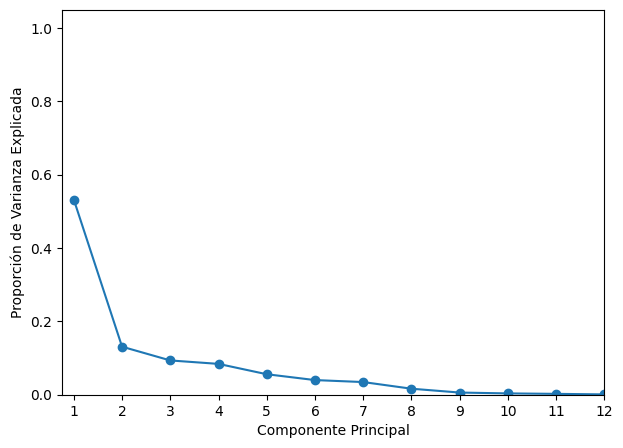

In [36]:
# Graficamos la explicación de la varianza por cada CP.
# Grafico de Catell (dice lo mismo que el criterio de kaiser) (proporcion de la varianza explicada por los CP)
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proporción de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

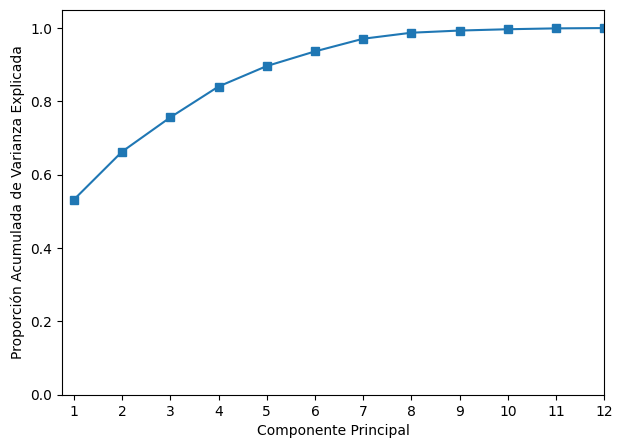

In [37]:
# Graficamos la explicación de la varianza acumulada por cada CP.
# Basicamente es pareto
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

In [38]:
# Tomamos una decision!
# Nos quedamos con 4 componenrtes, que explican el 84% de la variabilidad total de los datos

In [39]:
# Debido a que ya decidimos con cuantos componentes quedarnos volvemos a realizar el analisis!

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=4) # Instancio o codificas
pca = pca.fit(X)          # Tenemos el ACP ejecutado

In [42]:
# Hallamos las cargas factoriales!
# Explicacion!
# Cargas factoriales indican cada nuevo componente o variable, cuanto es explicado por cada variable (que peso tiene)
pca_loadings = pca.components_

In [43]:
# Mostramos las cargas factoriales de cada componente principal en un DataFrame
pd.DataFrame(pca_loadings, columns=data_imp.columns, index=['PC1', 'PC2', 'PC3','PC4']).head(7).T

,PC1,PC2,PC3,PC4
tfr,0.346894,-0.083696,-0.083777,-0.013917
contraception,-0.291075,-0.072550,0.155120,0.129990
educationMale,-0.249525,-0.572370,-0.023672,-0.187593
educationFemale,-0.247633,-0.550062,0.004603,-0.205239
lifeMale,-0.356734,0.092214,-0.123227,0.311711
lifeFemale,-0.368883,0.111310,-0.083840,0.232764
infantMortality,0.360814,-0.156859,0.066465,-0.182938
GDPperCapita,-0.232363,-0.305637,0.103567,0.313647
economicActivityMale,0.164950,-0.028049,0.369437,0.656962
economicActivityFemale,-0.021774,0.019066,0.884980,-0.214525


In [ ]:
# No importa el signo, importa el valor

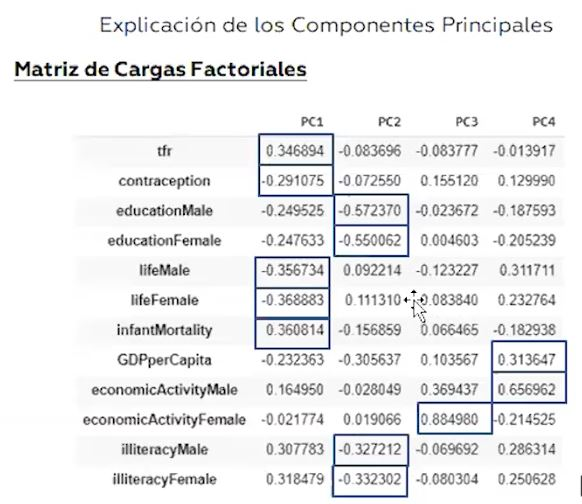

In [ ]:
# La primera variable (de las 12) (tfr) es explicada en el PC1 al 34%
# La segunda variable (de las 12) (contraception) es explicada en el PC1 al 29%
# La tercera variable (de las 12) (educationMale) es explicada en el PC2 al 57%
# ...

In [ ]:
# PC1 = 0.34 * tfr - 0.29 * contraception - 0.24 * educationMale - ...
# PC2 = -0.08 * tfr - 0.0725 * contraception - ....
# ...

In [ ]:
# Es importante renombrar los componentes (un nombre que resuma las variables para cada componente)

# PC1 ==> GradoSubdesarrolloAgresivo
# PC2 ==> BajaFormacionEducativa
# PC3 ==> ActividadEconomicaMujeres
# PC4 ==> ActividadHombrePerCapita

In [44]:
 # Usando sklearn
pca_scores = pca.transform(X) # Puntuaciones factoriales

In [45]:
# Es la transformacion de las variables en los componentes, es el valor que toma cada fila en los CP

In [46]:
#df_plot = pd.DataFrame(pca_scores, columns=['PC1', 'PC2', 'PC3','PC4'], index=data_imp.index)
df_plot = pd.DataFrame(pca_scores, columns=['GradoSubdesarrolloAgresivo', 'BajaFormacionEducativa', 'ActividadEconomicaMujeres','ActividadHombrePerCapita'], index=data_imp.index)

In [47]:
df_plot.head()

,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita
0,5.082175,-2.642946,-1.697913,1.151947
1,-0.722870,0.525833,0.023662,-0.003320
2,0.680912,0.037419,-2.527468,1.222971
3,-1.712769,1.111205,-1.230114,-1.939722
4,-0.550405,0.446880,0.041457,-0.055326


In [48]:
data_final= pd.concat([data[columnas_no_input],df_plot],axis=1)
data_final.head()

,country,region,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita
0,Afghanistan,Asia,5.082175,-2.642946,-1.697913,1.151947
1,Albania,Europe,-0.722870,0.525833,0.023662,-0.003320
2,Algeria,Africa,0.680912,0.037419,-2.527468,1.222971
3,American.Samoa,Asia,-1.712769,1.111205,-1.230114,-1.939722
4,Andorra,Europe,-0.550405,0.446880,0.041457,-0.055326


In [49]:
data_final[data_final['country']=='Peru']

,country,region,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita
147,Peru,America,-1.612952,-0.028608,-1.994727,-2.599004


In [50]:
data_final[data_final['region']=='America']

,country,region,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita
6,Antigua,America,-0.896310,0.296113,0.468104,-0.151517
7,Argentina,America,-1.513154,0.738986,-0.321316,0.147463
12,Bahamas,America,-2.387022,0.025625,1.649145,0.292536
15,Barbados,America,-2.266057,0.976970,0.732163,-0.184108
18,Belize,America,-0.287829,0.739479,-0.882298,1.108447
21,Bolivia,America,0.610689,0.108299,0.485795,-1.049252
24,Brazil,America,-0.701576,0.113933,1.077933,0.730953
31,Canada,America,-4.131269,-3.268136,0.457537,-0.455008
35,Chile,America,-1.508545,0.775956,-0.999961,0.083849
37,Colombia,America,-1.324526,0.613861,0.489813,0.271303


In [51]:
df_plot.corr()

,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita
GradoSubdesarrolloAgresivo,1.000000e+00,4.538900e-15,3.864168e-16,8.114918e-17
BajaFormacionEducativa,4.538900e-15,1.000000e+00,9.482318e-16,9.135179e-17
ActividadEconomicaMujeres,3.864168e-16,9.482318e-16,1.000000e+00,-2.374197e-16
ActividadHombrePerCapita,8.114918e-17,9.135179e-17,-2.374197e-16,1.000000e+00


In [52]:
# Tenemos un nuevo data set con menos variables que no son correlacionadas entre si

In [53]:
df_plot.shape

(207, 4)

In [54]:
# Graficamos las variables y su relacion con los CP.

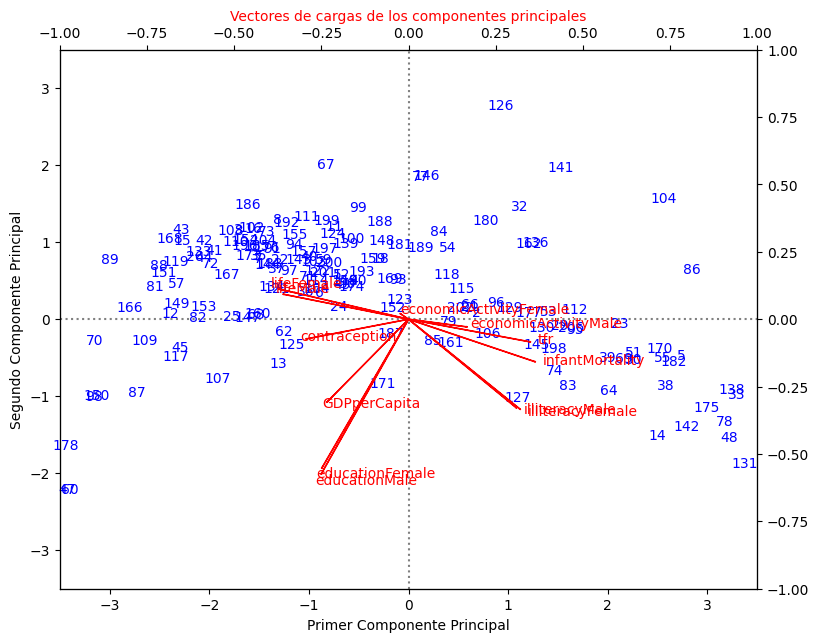

In [57]:
biplot(loadings=pca_loadings, scores=pca_scores, index=data_imp.index, columns=data_imp.columns)

In [ ]:
# Fin!

# Segmentación o Cluster

In [ ]:
# Segmentación o Cluster de países del mundo!

In [58]:
df_plot.head()

,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita
0,5.082175,-2.642946,-1.697913,1.151947
1,-0.722870,0.525833,0.023662,-0.003320
2,0.680912,0.037419,-2.527468,1.222971
3,-1.712769,1.111205,-1.230114,-1.939722
4,-0.550405,0.446880,0.041457,-0.055326


In [59]:
df_plot.shape

(207, 4)

In [60]:
# Usamos el algoritmo de K-Means ++
from sklearn.cluster import KMeans
km = KMeans(3,                    # Numero de clusters
            init='k-means++',     # La eleccion de los centroides iniciales (++), lo hace inteligente
            random_state = 3425)

In [61]:
# Ajustamos o aplicamos el k-means!
# Aprovecharemos el escalamiento de los componentes principales
# Reduccion de dimensiones + Cluster (segmentacion)
km.fit(df_plot)

KMeans(n_clusters=3, random_state=3425)

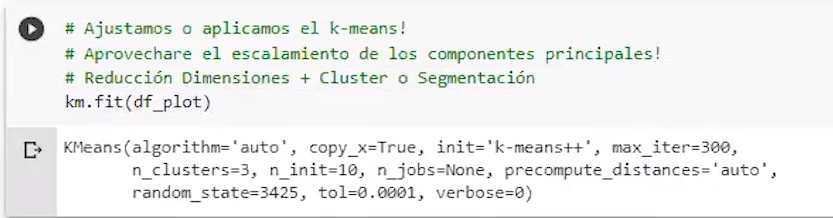

In [62]:
km.n_clusters

3

In [63]:
# Centroides: Es el corazon de cada cluster (el vector de promedios) (en este ejemplo hay 3 centroides y cuatro elementos (variables) por centroide)
# Es un vector de 4 elementos
km.cluster_centers_

array([[-0.8750998 ,  0.64186913, -0.12561265,  0.00458658],
       [ 3.34886716, -0.56905645,  0.04262987, -0.17449902],
       [-3.39615137, -1.63303089,  0.46977663,  0.36075802]])

In [64]:
# Cluster 1 ==> Tiene bajo subdesarrolo (-0.87)
# Cluster 2 ==> Tiene alto subdesarrolo (3.34)
# Cluster 3 ==> Tiene muy bajo subdesarrolo (-3.39)

In [65]:
# Encontramos o hallamos el segmento por o cluster por pais!
SegmentoPais = km.predict(df_plot)

In [66]:
SegmentoPais

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1,
       0, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

In [67]:
len(SegmentoPais)

207

In [68]:
df_plot['SegmentoPais'] = SegmentoPais

In [69]:
# Mi dataset era X
# AHora sera X,Y --> Agregamos el grupo o segmento o cluster

In [70]:
df_plot.head(11)

,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita,SegmentoPais
0,5.082175,-2.642946,-1.697913,1.151947,1
1,-0.722870,0.525833,0.023662,-0.003320,0
2,0.680912,0.037419,-2.527468,1.222971,0
3,-1.712769,1.111205,-1.230114,-1.939722,0
4,-0.550405,0.446880,0.041457,-0.055326,0
5,2.740343,-0.526613,0.479607,-1.812009,1
6,-0.896310,0.296113,0.468104,-0.151517,0
7,-1.513154,0.738986,-0.321316,0.147463,0
8,-1.319197,1.246432,-0.447275,-1.753638,0
9,-3.836288,-2.653954,0.418249,0.076439,2


In [71]:
# Cantidad de elementos por grupo
df_plot.groupby('SegmentoPais').count()

,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita
SegmentoPais,,,,
0,121,121,121,121
1,59,59,59,59
2,27,27,27,27


In [72]:
# Siempre le debemos poner un nombre al grupo o cluster de acuerdo a las características que tiene!
clust_map = {
    0:'Cluster0',
    1:'Cluster1',
    2:'Cluster2'}

df_plot.SegmentoPais = df_plot.SegmentoPais.map(clust_map)

In [73]:
df_plot.head(11)

,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita,SegmentoPais
0,5.082175,-2.642946,-1.697913,1.151947,Cluster1
1,-0.722870,0.525833,0.023662,-0.003320,Cluster0
2,0.680912,0.037419,-2.527468,1.222971,Cluster0
3,-1.712769,1.111205,-1.230114,-1.939722,Cluster0
4,-0.550405,0.446880,0.041457,-0.055326,Cluster0
5,2.740343,-0.526613,0.479607,-1.812009,Cluster1
6,-0.896310,0.296113,0.468104,-0.151517,Cluster0
7,-1.513154,0.738986,-0.321316,0.147463,Cluster0
8,-1.319197,1.246432,-0.447275,-1.753638,Cluster0
9,-3.836288,-2.653954,0.418249,0.076439,Cluster2


In [74]:
# Analizamos las variables, sus asociaciones y representaciones en los cluster!

In [75]:
# Establecemos los colores de los cluster!
d_color = {
    'Cluster0':'yellow',
    'Cluster1':'red',
    'Cluster2':'green'}

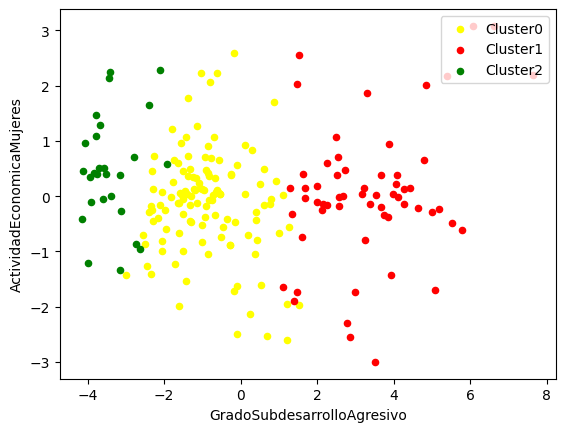

In [76]:
# Grafico de las variables, asociaciones y cluster!
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df_plot[df_plot.SegmentoPais == clust].plot(kind='scatter', x='GradoSubdesarrolloAgresivo', y='ActividadEconomicaMujeres', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="upper right")

In [77]:
# Cluster 2 ==> Paises desarrollados, actividad economica en mujeres elevado (por encima de -1)
# Cluster 0 ==>
# Cluster 1 ==> Tiene buena actividad economica en mujeres (elevado); sin embargo, tiene altos indices de subdesarrollo (en algunos casos)

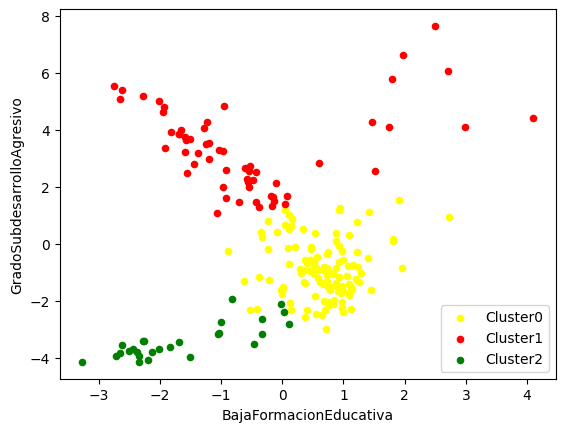

In [78]:
# Grafico de las variables, asociaciones y cluster!
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df_plot[df_plot.SegmentoPais == clust].plot(kind='scatter', x='BajaFormacionEducativa', y='GradoSubdesarrolloAgresivo', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

In [79]:
# Cluster 2 ==> No tiene baja formacion educativa, tiene desarrollo

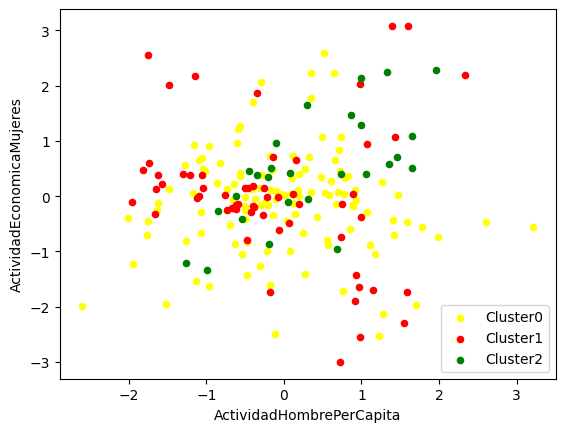

In [80]:
# Grafico de las variables, asociaciones y cluster!
fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df_plot[df_plot.SegmentoPais == clust].plot(kind='scatter', x='ActividadHombrePerCapita', y='ActividadEconomicaMujeres', label=clust, ax=ax, color=color)
handles, labels = ax.get_legend_handles_labels()
_ = ax.legend(handles, labels, loc="lower right")

In [81]:
# Es algo variado, no hay mucha diferencia
# Los cluster no necesariamente se van a diferenciar en todo

In [82]:
df_plot2 = df_plot.copy()

In [83]:
df_plot2.head()

,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita,SegmentoPais
0,5.082175,-2.642946,-1.697913,1.151947,Cluster1
1,-0.722870,0.525833,0.023662,-0.003320,Cluster0
2,0.680912,0.037419,-2.527468,1.222971,Cluster0
3,-1.712769,1.111205,-1.230114,-1.939722,Cluster0
4,-0.550405,0.446880,0.041457,-0.055326,Cluster0


In [84]:
df_plot2 = df_plot2.drop('SegmentoPais',axis=1)

In [85]:
df_plot2.head()

,GradoSubdesarrolloAgresivo,BajaFormacionEducativa,ActividadEconomicaMujeres,ActividadHombrePerCapita
0,5.082175,-2.642946,-1.697913,1.151947
1,-0.722870,0.525833,0.023662,-0.003320
2,0.680912,0.037419,-2.527468,1.222971
3,-1.712769,1.111205,-1.230114,-1.939722
4,-0.550405,0.446880,0.041457,-0.055326


In [86]:
SegmentoPais

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0, 0, 1, 1,
       0, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 2,
       0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int32)

In [87]:
# Validacion de nuestro cluster!
from sklearn import metrics
from sklearn import metrics

# Obtenemos los indicadores de clustering:
print('Inercia: '+str(km.inertia_))
print('Silueta: '+str(metrics.silhouette_score(df_plot2, SegmentoPais, metric='euclidean')))

Inercia: 867.7558214256092
Silueta: 0.3759660163715226


In [ ]:
# Silueta = 0.37 ==> Indica que el cluster va de -1 a 1, en este caso, el cluster esta moderado, si hay discriminancia (es dificil que el cluster llegue a 1, max llega a 0.65)
# Incercia = 867.75 ==>

In [ ]:
# Resumen Metodologico

 # X (207,12)    ---- >     Z (207,4) ACP      --- ----> Y (Cluster)
 # X,Y (207,13)    ---- >   Z,Y (207,5) ACP  --- ----> Y (Clasificacion, Regresion)
 # Perfilamiento!
 # X , Y

In [ ]:
# Fin!

# Anexos

In [ ]:
# Anexos!
def biplot(loadings, scores, index, columns):
    fig , ax1 = plt.subplots(figsize=(9,7))

    ax1.set_xlim(-3.5,3.5)
    ax1.set_ylim(-3.5,3.5)

    # Nombre de cada estado ubicado por puntajes para cada componente principal
    for i, index in enumerate(index):
        ax1.annotate(index, (scores[i, 0], scores[i, 1]), ha='center', color='blue')

    # Líneas de referencia
    ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
    ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

    ax1.set_xlabel('Primer Componente Principal')
    ax1.set_ylabel('Segundo Componente Principal')

    # Diagramar los vectores de cargas, superponiendo un segundo eje x, y
    ax2 = ax1.twinx().twiny()

    ax2.set_ylim(-1,1)
    ax2.set_xlim(-1,1)
    ax2.set_xlabel('Vectores de cargas de los componentes principales', color='red')

    # Vectores de carga
    # La variable 'a' es un pequeño offset para separar las etiquetas de las flechas
    a = 1.07
    for i, column in enumerate(columns):
        ax2.annotate(column, (loadings[0,i]*a, loadings[1,i]*a), color='red')
        ax2.arrow(0, 0, loadings[0,i], loadings[1,i], color='red')
    plt.show()